In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import yfinance as yf

# Load Stock Data
ticker = input("Enter Stock Ticker(e.g., AAPL, TSLA, MSFT): ")
df = yf.download(ticker, start="2015-01-01", end="2024-01-01")
df = df[['Close']]
df.dropna(inplace=True)
print(df.head())

# Normalize the Data (Scaling between 0 and 1)
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(df)

# Prepare Data for Time-Series Forecasting
time_steps = 60  # Use last 60 days to predict the next day
X, y = [], []

for i in range(time_steps, len(data_scaled)):
    X.append(data_scaled[i-time_steps:i, 0])  # Last 60 days
    y.append(data_scaled[i, 0])  # Next day's price

# Convert lists to numpy arrays
X, y = np.array(X), np.array(y)

# Split Data into Training and Testing Sets
split = int(len(X) * 0.8)  # 80% for training, 20% for testing
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape input data to fit LSTM input shape (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),  # Dropout for regularization
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)  # Final output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model architecture
model.summary()




Enter Stock Ticker(e.g., AAPL, TSLA, MSFT): AAPL
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close
Ticker           AAPL
Date                 
2015-01-02  24.320427
2015-01-05  23.635292
2015-01-06  23.637510
2015-01-07  23.968958
2015-01-08  24.889900



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - loss: 0.0373 - val_loss: 0.0017
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0023 - val_loss: 0.0038
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0018 - val_loss: 0.0063
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0018 - val_loss: 0.0080
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0015 - val_loss: 0.0020
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 9.8067e-04 - val_loss: 0.0021
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 8.9678e-04 - val_loss: 0.0015
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 7.9828e-04 - val_loss: 0.0014
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step

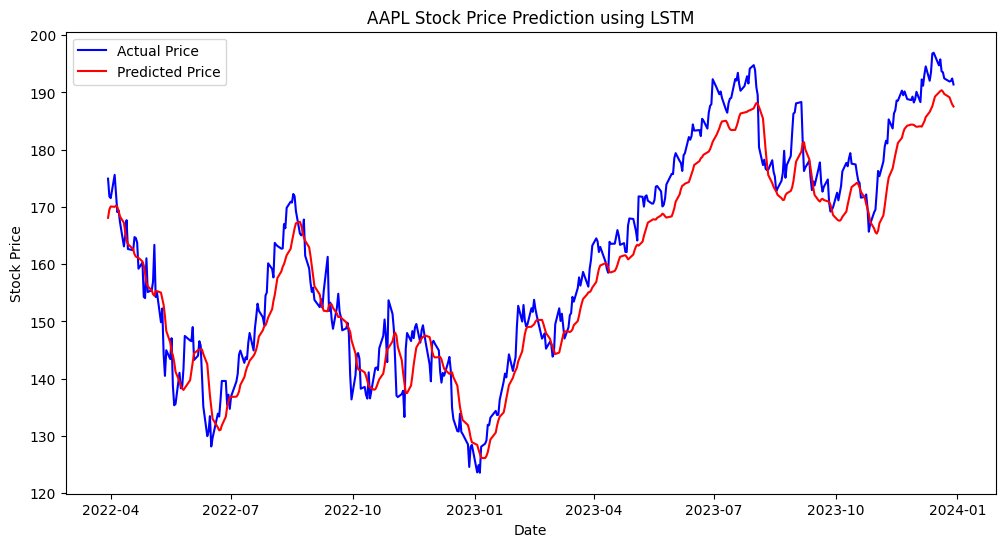

In [2]:
# Train the LSTM Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Convert predicted values back to original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_original = scaler.inverse_transform(y_test.reshape(-1,1))

# Step 8: Evaluate Model Performance
mae = mean_absolute_error(y_test_original, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Step 9: Visualize Actual vs Predicted Prices
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], y_test_original, label="Actual Price", color='blue')
plt.plot(df.index[-len(y_test):], y_pred, label="Predicted Price", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"{ticker} Stock Price Prediction using LSTM")
plt.legend()
plt.show()
